In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

carregando Dados

In [57]:
df = pd.read_csv('../dataset/zomato.csv')

Funções

In [59]:
COUNTRIES = {
1: "India",
14: "Australia",
30: "Brazil",
37: "Canada",
94: "Indonesia",
148: "New Zeland",
162: "Philippines",
166: "Qatar",
184: "Singapure",
189: "South Africa",
191: "Sri Lanka",
208: "Turkey",
214: "United Arab Emirates",
215: "England",
216: "United States of America",
}
def country_name(country_id):
    return COUNTRIES[country_id]

In [60]:
def create_price_tye(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"

In [61]:
COLORS = {
"3F7E00": "darkgreen",
"5BA829": "green",
"9ACD32": "lightgreen",
"CDD614": "orange",
"FFBA00": "red",
"CBCBC8": "darkred",
"FF7800": "darkred",
}
def color_name(color_code):
    return COLORS[color_code]

In [63]:
def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    
    return df

Limpando Dados

In [64]:
# categorizando a coluna Cuisines
df.loc[:,'Cuisines'] = df.loc[:,'Cuisines'].astype( str )
df['Cuisines'] = df.loc[:,'Cuisines'].apply(lambda x: x.split(',')[0])
df['Cuisines'] = df.loc[:,'Cuisines'].apply(lambda x: "Coffee" if x == 'Restaurant Cafe' or x == 'Cafe Food' else x )
# preenchendo o nome dos paises
df['Country Code'] = df.loc[:,'Country Code'].apply(lambda x: country_name(x))
# criando uma nova coluna tipos de comidAAa
df['Price Type'] = df.loc[:,'Price range'].apply(lambda x: create_price_tye(x))
# Criando a coluna Color Name
df['Rating color'] = df.loc[:,'Rating color'].apply(lambda x: color_name(x))
#retirando as informações vazias
df = df.loc[df['Restaurant ID'].notnull(),:]
df = df.loc[df['Restaurant Name'].notnull(),:]
df = df.loc[df['Cuisines'].notnull(),:]
df = df.drop_duplicates()

df_copy = df.copy()


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 7526
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         6942 non-null   int64  
 1   Restaurant Name       6942 non-null   object 
 2   Country Code          6942 non-null   object 
 3   City                  6942 non-null   object 
 4   Address               6942 non-null   object 
 5   Locality              6942 non-null   object 
 6   Locality Verbose      6942 non-null   object 
 7   Longitude             6942 non-null   float64
 8   Latitude              6942 non-null   float64
 9   Cuisines              6942 non-null   object 
 10  Average Cost for two  6942 non-null   int64  
 11  Currency              6942 non-null   object 
 12  Has Table booking     6942 non-null   int64  
 13  Has Online delivery   6942 non-null   int64  
 14  Is delivering now     6942 non-null   int64  
 15  Switch to order menu 

In [73]:
linhas_nulas = df.isnull().any(axis=1)
linhas_nulas

0       False
2       False
3       False
4       False
5       False
        ...  
7522    False
7523    False
7524    False
7525    False
7526    False
Length: 6942, dtype: bool

In [14]:
colunas_nulas = df.isnull().sum()
colunas_nulas

Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                15
Average Cost for two     0
Currency                 0
Has Table booking        0
Has Online delivery      0
Is delivering now        0
Switch to order menu     0
Price range              0
Aggregate rating         0
Rating color             0
Rating text              0
Votes                    0
dtype: int64

Visualizando os dados

In [8]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Price Type
0,6310675,Mama Lou's Italian Kitchen,Philippines,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,1,0,0,0,3,4.6,darkgreen,Excellent,619,expensive
1,6310675,Mama Lou's Italian Kitchen,Philippines,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,1,0,0,0,3,4.6,darkgreen,Excellent,619,expensive
2,6314542,Blackbird,Philippines,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.024562,14.556042,European,...,0,0,0,0,4,4.7,darkgreen,Excellent,469,gourmet
3,6301293,Banapple,Philippines,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.023171,14.556196,Filipino,...,0,0,0,0,3,4.4,green,Very Good,867,expensive
4,6315689,Bad Bird,Philippines,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027708,14.565899,American,...,0,0,0,0,3,4.4,green,Very Good,858,expensive


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7512 entries, 0 to 7526
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7512 non-null   int64  
 1   Restaurant Name       7512 non-null   object 
 2   Country Code          7512 non-null   object 
 3   City                  7512 non-null   object 
 4   Address               7512 non-null   object 
 5   Locality              7512 non-null   object 
 6   Locality Verbose      7512 non-null   object 
 7   Longitude             7512 non-null   float64
 8   Latitude              7512 non-null   float64
 9   Cuisines              7512 non-null   object 
 10  Average Cost for two  7512 non-null   int64  
 11  Currency              7512 non-null   object 
 12  Has Table booking     7512 non-null   int64  
 13  Has Online delivery   7512 non-null   int64  
 14  Is delivering now     7512 non-null   int64  
 15  Switch to order menu 

In [11]:
df.shape

(7512, 22)

In [9]:
df.loc[:,'Country Code'].unique()

array(['Philippines', 'Brazil', 'Australia', 'United States of America',
       'Canada', 'Singapure', 'United Arab Emirates', 'India',
       'Indonesia', 'New Zeland', 'England', 'Qatar', 'South Africa',
       'Sri Lanka', 'Turkey'], dtype=object)

# 1.Geral

## 1.1.Quantos restaurantes únicos estão registrados?

In [65]:
restaurant_unique = df.loc[:,'Restaurant ID'].nunique()

print('Quantidade de Restaurantes unicos registrados no sistema {}'.format(restaurant_unique))

Quantidade de Restaurantes unicos registrados no sistema 6942


## 1.2.Quantos países únicos estão registrados?

In [66]:
Country_unique = df.loc[:,'Country Code'].nunique()

print('Quantidade de Paises unicos no Sistema {}'.format(Country_unique))

Quantidade de Paises unicos no Sistema 15


## 1.3.Quantas cidades únicas estão registradas?

In [67]:
City_unique = df.loc[:,'City'].nunique()

print('Quantidade de Cidades unicas registradas {}'.format(City_unique))

Quantidade de Cidades unicas registradas 125


## 1.4.Qual o total de avaliações feitas?

In [68]:
all_rating = int(df.loc[:,'Votes'].sum())
all_rating = f'{all_rating:,}'
all_rating = all_rating.replace('.',',').replace(',','.')
#print('O total de avaliações ja realizadas {}'.format(all_rating))

print(all_rating)

4.195.634


## 1.5.Qual o total de tipos de culinária registrados?

In [69]:
totaly_typs = df.loc[:,'Cuisines'].nunique()

print('total de tipos de culinarias {}'.format(totaly_typs))

total de tipos de culinarias 164


# 2.Pais

## 2.1.Qual o nome do país que possui mais cidades registradas?

In [13]:
cols = ['Country Code','City']

df_aux = df.loc[:,cols].groupby('Country Code').nunique().sort_values('City', ascending=False).reset_index()

df_aux.iloc[0,0]

'India'

## 2.2.Qual o nome do país que possui mais restaurantes registrados?

In [17]:
cols = ['Country Code','Restaurant Name']

df_aux = df.loc[:,cols].groupby('Country Code').nunique().sort_values('Restaurant Name', ascending=False).reset_index()

df_aux.iloc[0,0]

'India'

## 2.3.Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados?

In [20]:
cols = ['Country Code','Restaurant Name']

df_aux = df.loc[df['Price range'] == 4,cols].groupby('Country Code').nunique().sort_values('Restaurant Name', ascending=False).reset_index()

df_aux.iloc[0,0]

'United States of America'

## 2.4. Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?

In [22]:
cols = ['Country Code','Cuisines']

df_aux = df.loc[:,cols].groupby('Country Code').nunique().sort_values('Cuisines', ascending=False).reset_index()

df_aux.iloc[0,0]

'India'

## 2.5.Qual o nome do país que possui a maior quantidade de avaliações feitas?

In [24]:
#sum(df.loc[:,'Votes'].apply(lambda x: x))
cols = ['Country Code','Votes']

df_aux = df.loc[:,cols].apply(lambda x: x)

df_avl = df_aux.loc[:,cols].groupby('Country Code').sum().sort_values('Votes', ascending=False).reset_index()

df_avl.iloc[0,0]

'India'

## 2.6.Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?

In [27]:
cols = ['Country Code','Is delivering now']

df_aux = df.loc[df['Is delivering now'] == 1,cols].groupby('Country Code').count().sort_values('Is delivering now', ascending=False).reset_index()

df_aux.iloc[0,0]

'India'

## 2.7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?

In [107]:
cols = ['Country Code','Has Table booking']

df_aux = df.loc[df['Has Table booking'] == 1,cols].groupby('Country Code').count().sort_values('Has Table booking', ascending=False).reset_index()

df_aux.iloc[0,0]

'India'

## 2.8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registrada?

In [29]:
cols = ['Country Code','Votes']

df_aux = df.loc[:,cols].apply(lambda x: x)

df_avl = df_aux.loc[:,cols].groupby('Country Code').mean().sort_values('Votes', ascending=False).reset_index()

df_avl.iloc[0,0]

'Indonesia'

## 2.9. Qual o nome do país que possui, na média, a maior nota média registrada?

In [32]:
cols = ['Country Code','Aggregate rating']

df_aux = round(df.loc[:,cols].groupby('Country Code').mean().sort_values('Aggregate rating', ascending=False).reset_index(),2)

df_aux.iloc[0,0]

'Indonesia'

## 2.10. Qual o nome do país que possui, na média, a menor nota média registrada?

In [116]:
cols = ['Country Code','Aggregate rating']

df_aux = df.loc[:,cols].groupby('Country Code').mean().sort_values('Aggregate rating', ascending=True).reset_index()

df_aux.iloc[0,0]

'Brazil'

## 2.11. Qual a média de preço de um prato para dois por país?

In [37]:

df_aux = round(df.loc[:,'Average Cost for two'].mean(),2)

print('Valor medio de prato para dois: {}'.format(df_aux))

Valor medio de prato para dois: 7165.67


# 3.Cidade

## 3.1. Qual o nome da cidade que possui mais restaurantes registrados ?

In [65]:
cols = ['City','Restaurant Name']

df_aux = df.loc[:,cols].groupby('City').nunique().sort_values('Restaurant Name', ascending=False).reset_index()

df_aux.iloc[0,0]

'Edinburgh'

## 3.2. Qual o nome da cidade que possui mais restaurantes com nota média acima de 4?

In [57]:
cols = ['City','Restaurant Name']

df_aux = df.loc[df['Aggregate rating'] > 4,cols].groupby('City').nunique().sort_values('Restaurant Name', ascending=False).reset_index()

df_aux.iloc[0,0]

'Houston'

## 3.3. Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

In [34]:
cols = ['City','Restaurant Name']

df_aux = df.loc[df['Aggregate rating'] < 2.5,cols].groupby('City').count().sort_values('Restaurant Name', ascending=False).reset_index()

df_aux.iloc[0,0]

'Gangtok'

## 3.4. Qual o nome da cidade que possui o maior valor médio de um prato para dois?

In [59]:
cols = ['City','Average Cost for two']

df_aux = round(df.loc[:,cols].groupby('City').mean().sort_values('Average Cost for two', ascending=False).reset_index(),2)

df_aux.iloc[0,0]

'Adelaide'

## 3.5. Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintas?

In [61]:
cols = ['City','Cuisines']

df_aux = df.loc[:,cols].groupby('City').nunique().sort_values('Cuisines', ascending=False).reset_index()

df_aux.iloc[0,0]

'Birmingham'

## 3.6. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem reservas?

In [62]:
cols = ['City','Restaurant ID']

df_aux = df.loc[df['Has Table booking'] == 1,cols].groupby('City').count().sort_values('Restaurant ID', ascending=False).reset_index()

df_aux.iloc[0,0]

'Bangalore'

## 3.7. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

In [63]:
cols = ['City','Restaurant ID']

df_aux = df.loc[df['Is delivering now'] == 1,cols].groupby('City').count().sort_values('Restaurant ID', ascending=False).reset_index()

df_aux.iloc[0,0]

'Aurangabad'

## 3.8. Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

In [64]:
cols = ['City','Restaurant ID']

df_aux = df.loc[df['Has Online delivery'] == 1,cols].groupby('City').count().sort_values('Restaurant ID', ascending=False).reset_index()

df_aux.iloc[0,0]

'Abu Dhabi'

# 4.Restaurantes

## 4.1. Qual o nome do restaurante que possui a maior quantidade de avaliações?

In [15]:
cols = ['Restaurant Name','Votes']

df_aux = df.loc[:,cols].apply(lambda x: x)

df_avl = df_aux.loc[:,cols].groupby('Restaurant Name').sum().sort_values('Votes',ascending=False).reset_index()

df_avl.iloc[0,0]

"Domino's Pizza"

## 4.2. Qual o nome do restaurante com a maior nota média?

In [20]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[:,cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=False).reset_index()

df_aux.iloc[0,0]

"Phil's Bbq"

## 4.3. Qual o nome do restaurante que possui o maior valor de uma prato para duas pessoas?

In [23]:
cols = ['Restaurant Name','Average Cost for two']

df_aux = df.loc[:,cols].sort_values('Average Cost for two',ascending=False)

df_aux.iloc[0,0]

"d'Arry's Verandah Restaurant"

## 4.4. Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?

In [30]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'Brazilian',cols].sort_values('Aggregate rating',ascending=True)

df_aux.iloc[0,0]

'Tempero das Gerais'

## 4.5. Qual o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação?

In [36]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[(df['Cuisines'] == 'Brazilian') & (df['Country Code'] == 'Brazil'),cols].sort_values('Aggregate rating',ascending=False)

df_aux.iloc[0,0]

'Braseiro da Gávea'

## 4.6. Os restaurantes que aceitam pedido online são também, na média, os restaurantes que mais possuem avaliações registradas?

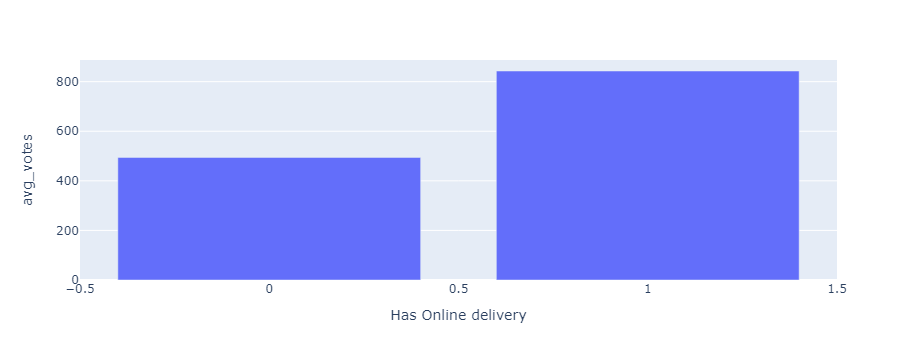

In [52]:
cols = ['Has Online delivery','Votes']

df_entregas = df.loc[:,cols].groupby('Has Online delivery').agg({'Votes':['mean']})

df_entregas.columns = ['avg_votes']

df_entregas = df_entregas.reset_index()

fig = px.bar(df_entregas,x='Has Online delivery',y='avg_votes')

fig.show()

## 4.7. Os restaurantes que fazem reservas são também, na média, os restaurantes que possuem o maior valor médio de um prato para duas pessoas?

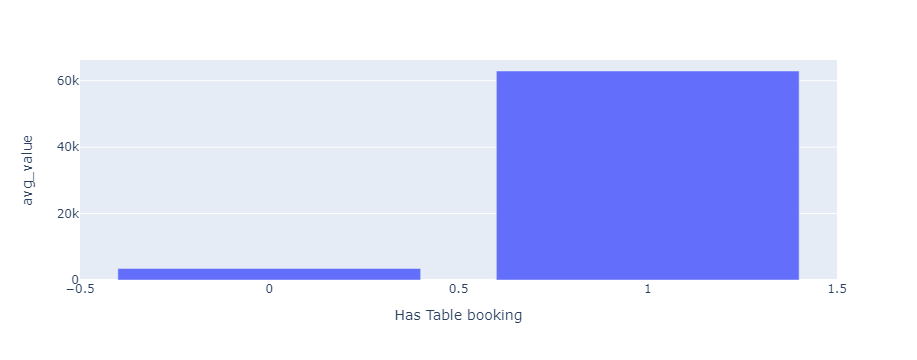

In [55]:
cols = ['Has Table booking','Average Cost for two']

df_entregas = df.loc[:,cols].groupby('Has Table booking').agg({'Average Cost for two':['mean']})

df_entregas.columns = ['avg_value']

df_entregas = df_entregas.reset_index()

fig = px.bar(df_entregas,x='Has Table booking',y='avg_value')

fig.show()

## 4.8. Os restaurantes do tipo de culinária japonesa dos Estados Unidos da América possuem um valor médio de prato para duas pessoas maior que as churrascarias americanas (BBQ)?

In [70]:
cols = ['Cuisines','Average Cost for two']

df_aux1 = df.loc[(df['Country Code'] == 'United States of America') & (df['Cuisines'] == 'Japanese') ,cols].groupby('Cuisines').mean()

df_aux2 = df.loc[(df['Country Code'] == 'United States of America') & (df['Cuisines'] == 'BBQ') ,cols].groupby('Cuisines').mean()

df_aux = pd.concat([df_aux1,df_aux2]).reset_index()

df_aux

,Cuisines,Average Cost for two
0,Japanese,56.406250
1,BBQ,39.642857


# 5.Tipos de Culinária

## 5.1. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a maior média de avaliação?

In [9]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'Italian',cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=False).reset_index()

df_aux.iloc[0,0]

'Central Grocery'

## 5.2. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação?

In [22]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'Italian',cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=True).reset_index()

df_aux.iloc[0,0]

'La Bocca Bar e Trattoria'

## 5.3. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a maior média de avaliação?

In [23]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'American',cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=False).reset_index()

df_aux.iloc[0,0]

'Fat Cat'

## 5.4. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação?

In [24]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'American',cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=True).reset_index()

df_aux.iloc[0,0]

'Alston Bar & Beef'

## 5.5. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a maior média de avaliação?

In [27]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'Arabian',cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=False).reset_index()

df_aux.iloc[0,0]

'Mandi@36'

## 5.6. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação?

In [28]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'Arabian',cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=True).reset_index()

df_aux.iloc[0,0]

'Raful'

## 5.7. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a maior média de avaliação?

In [29]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'Japanese',cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=False).reset_index()

df_aux.iloc[0,0]

'Samurai'

## 5.8. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação?

In [30]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'Japanese',cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=True).reset_index()

df_aux.iloc[0,0]

'Banzai Sushi'

## 5.9. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a maior média de avaliação?

In [31]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'Home-made',cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=False).reset_index()

df_aux.iloc[0,0]

'Kanaat Lokantası'

## 5.10. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação?

In [32]:
cols = ['Restaurant Name','Aggregate rating']

df_aux = df.loc[df['Cuisines'] == 'Home-made',cols].groupby('Restaurant Name').mean().sort_values('Aggregate rating',ascending=True).reset_index()

df_aux.iloc[0,0]

'GurMekan Restaurant'

## 5.11. Qual o tipo de culinária que possui o maior valor médio de um prato para duas pessoas?

In [38]:
cols = ['Cuisines','Average Cost for two']

df_aux = df.loc[:,cols].groupby('Cuisines').mean().sort_values('Average Cost for two',ascending=False).reset_index()

df_aux.iloc[0,0]

'Modern Australian'

## 5.12. Qual o tipo de culinária que possui a maior nota média?

In [41]:
cols = ['Cuisines','Aggregate rating']

df_aux = df.loc[:,cols].groupby('Cuisines').mean().sort_values('Aggregate rating',ascending=False).reset_index()

df_aux.iloc[0,0]

'Others'

## 5.13. Qual o tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas?

In [44]:
cols = ['Cuisines','Restaurant Name']

df_aux = df.loc[df['Has Online delivery'] == 1,cols].groupby('Cuisines').count().sort_values('Restaurant Name',ascending=False).reset_index()

df_aux.iloc[0,0]

'North Indian'

# Graficos para streamlit

## Quantidade de Restaurantes por Pais

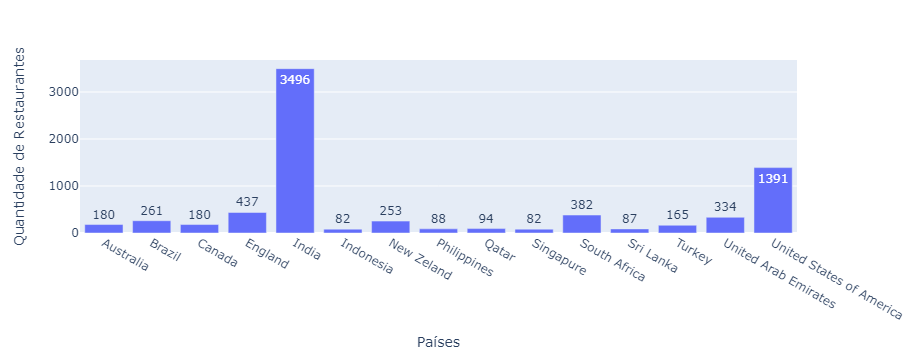

In [24]:
cols = ['Country Code','Restaurant Name']

df_aux = df.loc[:,cols].groupby('Country Code').count().reset_index()

fig = px.bar(df_aux,x='Country Code',y='Restaurant Name',text_auto = True,
             labels = {'Restaurant Name':'Quantidade de Restaurantes','Country Code':'Países'})

fig.show()

## Quantidade de Cidades Registradas por País

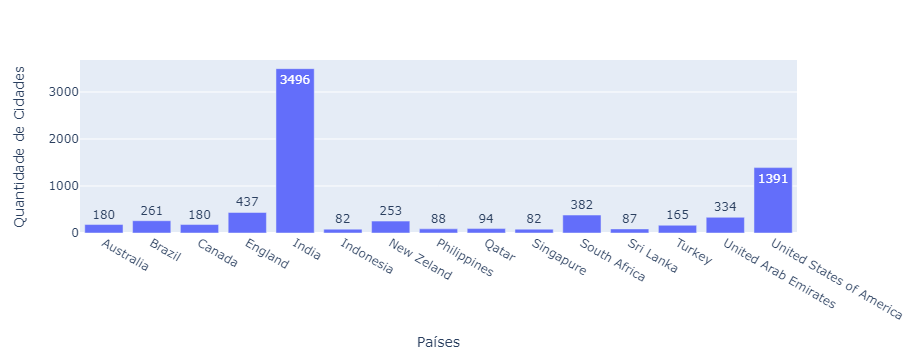

In [27]:
cols = ['Country Code','City']

df_aux = df.loc[:,cols].groupby('Country Code').count().reset_index()

px.bar(df_aux, x='Country Code', y='City',text_auto = True,
             labels = {'City':'Quantidade de Cidades','Country Code':'Países'})

## Média de Avaliação Feitas por Pais

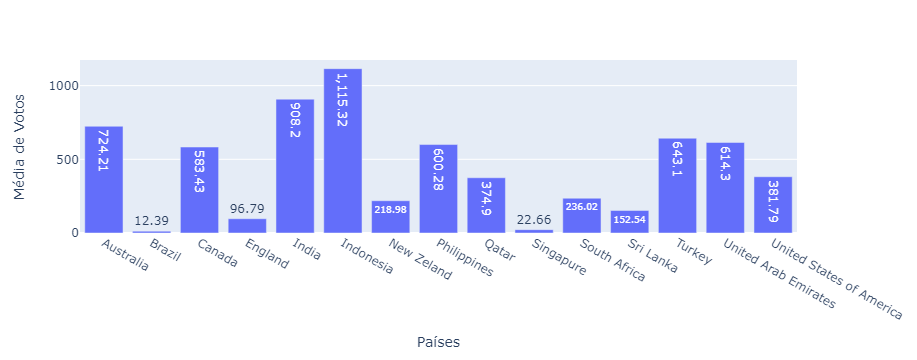

In [31]:
cols = ['Votes','Country Code']

df_aux = round(df.loc[:,cols].groupby('Country Code').mean().reset_index(),2)

px.bar(df_aux, x='Country Code', y='Votes',text_auto = True,
             labels = {'Votes':'Média de Votos','Country Code':'Países'})

## Média de preço de um prato para dois

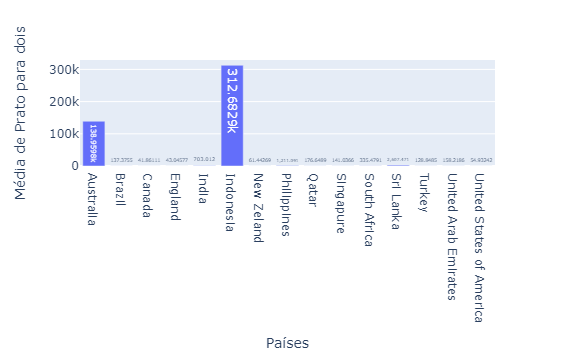

In [33]:
cols = ['Average Cost for two','Country Code']

df_aux = df.loc[:,cols].groupby('Country Code').mean().reset_index()

px.bar(df_aux, x='Country Code', y='Average Cost for two',text_auto = True,
             labels = {'Average Cost for two':'Média de Prato para dois','Country Code':'Países'})

## Top 10 Cidades com Mais restaurantes na base de dados

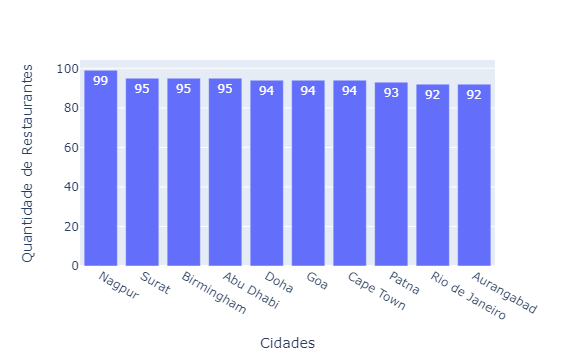

In [45]:
cols = ['City','Restaurant Name']

df_aux = df.loc[:,cols].groupby('City').count().sort_values('Restaurant Name',ascending=False).reset_index().head(10)

px.bar(df_aux, x='City', y='Restaurant Name',text_auto = True,
             labels = {'Restaurant Name':'Quantidade de Restaurantes','City':'Cidades'})

## Top 7 Cidades com Restaurantes com a média de avaliação acima de 4

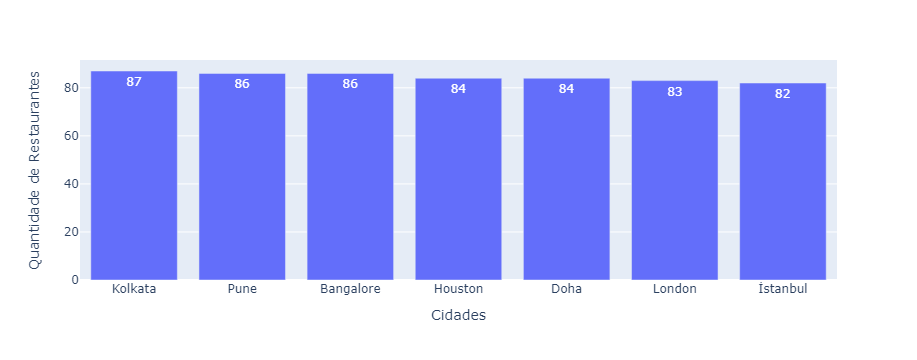

In [48]:
cols = ['Restaurant Name','City']

df_aux = df.loc[df['Aggregate rating'] >= 4,cols].groupby('City').count().sort_values('Restaurant Name',ascending=False).reset_index().head(7)

px.bar(df_aux,x='City',y='Restaurant Name',text_auto = True,
             labels = {'Restaurant Name':'Quantidade de Restaurantes','City':'Cidades'})

## Top 7 Cidades com Restaurantes com a média de avaliação abaixo de 2.5

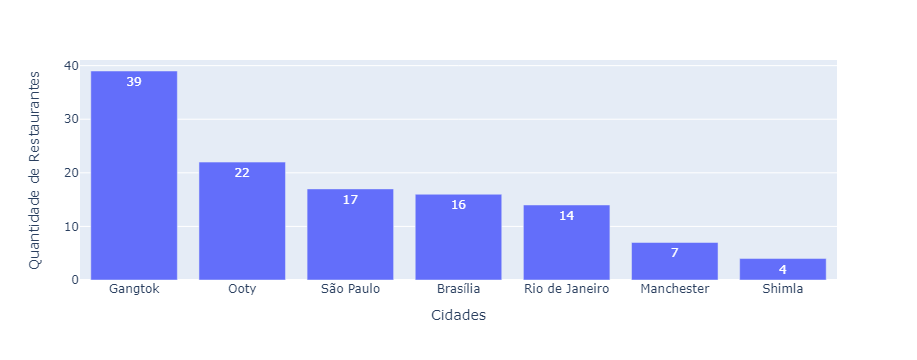

In [50]:
cols = ['Restaurant Name','City']

df_aux = df.loc[df['Aggregate rating'] <= 2.5,cols].groupby('City').count().sort_values('Restaurant Name',ascending=False).reset_index().head(7)

px.bar(df_aux,x='City',y='Restaurant Name',text_auto = True,
             labels = {'Restaurant Name':'Quantidade de Restaurantes','City':'Cidades'})

## Top 10 Cidade mais Restaurantes com tipos de culinária distintos

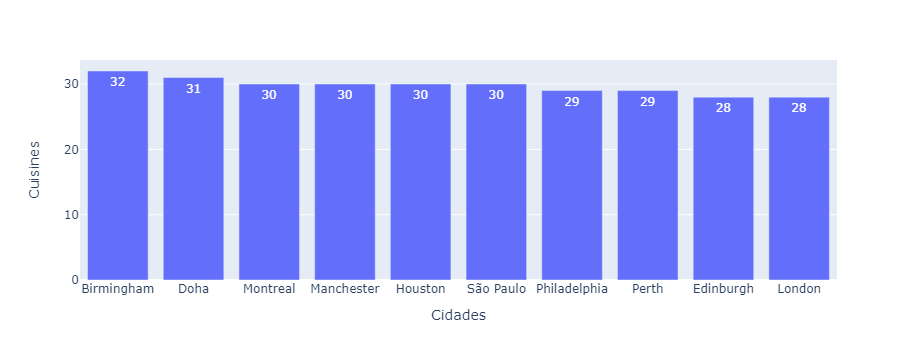

In [52]:
cols = ['City','Cuisines']

df_aux = df.loc[:,cols].groupby('City').nunique().sort_values('Cuisines', ascending=False).reset_index().head(10)

px.bar(df_aux, x='City', y='Cuisines',text_auto = True,
             labels = {'Curisines':'Quantidade de Culinarias distintas','City':'Cidades'})

## Top 10 Restaurantes

In [19]:
df = df.rename(columns={'Country Code': 'Country'})
cols = ['Restaurant ID','Restaurant Name','Country','City','Cuisines','Average Cost for two','Aggregate rating','Votes']

df.loc[:,cols].sort_values('Aggregate rating',ascending=False).head(10)


,Restaurant ID,Restaurant Name,Country,City,Cuisines,Average Cost for two,Aggregate rating,Votes
6132,18217279,Miann,New Zeland,Auckland,Desserts,25,4.9,571
6456,6901230,Yew Tree Cottage,England,Birmingham,Indian,10,4.9,26
543,16912869,Home Slice Pizza,United States of America,Austin,Pizza,30,4.9,1008
1667,17010857,Dalessandro's Steaks,United States of America,Philadelphia,Sandwich,25,4.9,287
3236,121316,Nando's,India,Chandigarh,Portuguese,1400,4.9,902
3237,121316,Nando's,India,Chandigarh,Portuguese,1400,4.9,902
3245,18972215,Baithak,India,Chandigarh,North Indian,800,4.9,89
1697,17030960,The Parlor Pizzeria,United States of America,Phoenix,Italian,25,4.9,286
6501,7600213,Oink,England,Edinburgh,British,15,4.9,96
5746,3800866,Meraki The Coffee House,India,Surat,Cafe,250,4.9,499


## Top 10 Melhores Tipos de Culinarias

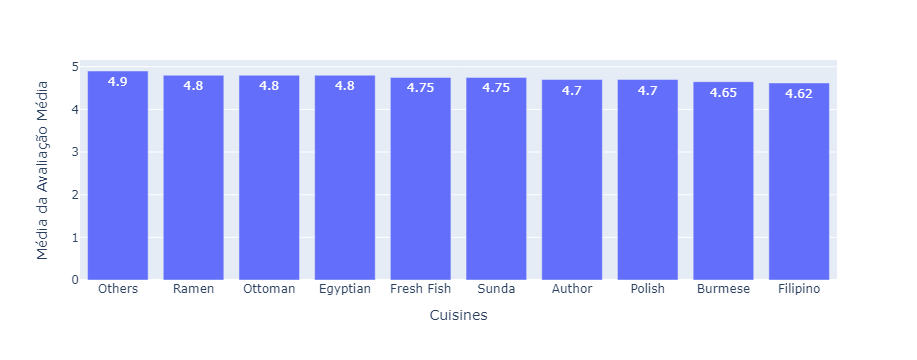

In [25]:
cols = ['Cuisines','Aggregate rating']

df_aux = round(df.loc[:,cols].groupby('Cuisines').mean().sort_values('Aggregate rating',ascending=False).reset_index().head(10),2)

px.bar(df_aux,x='Cuisines',y='Aggregate rating',text_auto = True,
             labels = {'Curisines':'Culinarias','Aggregate rating':'Média da Avaliação Média'})

## Top 10 Piores Tipos de Culinarias

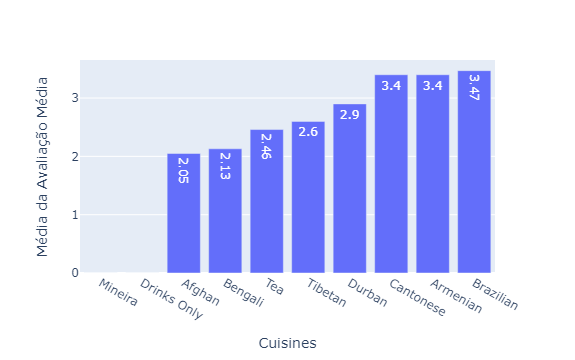

In [26]:
cols = ['Cuisines','Aggregate rating']

df_aux = round(df.loc[:,cols].groupby('Cuisines').mean().sort_values('Aggregate rating',ascending=True).reset_index().head(10),2)

px.bar(df_aux,x='Cuisines',y='Aggregate rating',text_auto = True,
             labels = {'Curisines':'Culinarias','Aggregate rating':'Média da Avaliação Média'})

## Mapa

In [ ]:
cols = ['City','Rating color','Latitude','Longitude']
    df_aux = (df_copy.loc[:, cols]
                .groupby(['City','Rating color'])
                .median()
                .reset_index())

map = fl.Map()

for index, location_info in df_copy.iterrows():
        fl.Marker([location_info['Latitude'],
                  location_info['Longitude']],
                  popup=location_info[['City','Rating color']]).add_to(map)
    
    folium_static( map )

In [16]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Price Type'],
      dtype='object')